In [1]:
# Import Libraries
! pip install mlxtend

import pandas 
from mlxtend.frequent_patterns import apriori # This function implements the Apriori algorithm for finding frequent itemsets in a transaction dataset. 
from mlxtend.frequent_patterns import association_rules # This function takes the frequent itemsets generated by apriori and additional parameters like minimum confidence and minimum lift. It then generates association rules based on these frequent itemsets. 

^C


In [2]:
# Load and Explore Data
data = pandas.read_csv('store.csv')
data

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
540652,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
540653,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
540654,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
540655,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
# Data cleaning
# fill null cells in customer ID with 0
# data['CustomerID'].fillna(0,inplace=True)
# We drop the rows that don’t have invoice numbers
data.dropna(axis=0, subset=['Description'], inplace=True)
# cleans the Description column using strip()
data['Description'] = data['Description'].str.strip() #.strip() method removes leading and trailing whitespaces from each string value in the Description column.
#  converts the data type of the InvoiceNo column to string
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data.head(10)


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
# lets use the country france only so as to keep the daataset small
data.groupby('Country').size()
# Adjust the Country
new_data = data[data['Country'] == 'France']
new_data

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
29,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
30,30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...,...
540652,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
540653,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
540654,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
540655,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
# lets create a busket/cart
# Groupby - InvoiceNo, Description, Quantity,
new_data.groupby(['InvoiceNo', 'Description']) ['Quantity'].sum()

InvoiceNo  Description                      
536370     ALARM CLOCK BAKELIKE GREEN           12
           ALARM CLOCK BAKELIKE PINK            24
           ALARM CLOCK BAKELIKE RED             24
           CHARLOTTE BAG DOLLY GIRL DESIGN      20
           CIRCUS PARADE LUNCH BOX              24
                                                ..
C580263    SET OF 6 HALLOWEEN GHOST T-LIGHTS   -36
           SKULL SHOULDER BAG                  -10
C581316    GLASS  SONGBIRD STORAGE JAR          -1
           RED RETROSPOT SUGAR JAM BOWL         -1
           REGENCY SUGAR BOWL GREEN             -1
Name: Quantity, Length: 8208, dtype: int64

In [6]:
# Pivot table
# pandas.set_option('display.max_columns', 300)
# pandas.set_option('display.max_rows', 200)
baskets = new_data.pivot_table(index='InvoiceNo', columns = 'Description', values= 'Quantity', fill_value=0)
baskets.head(15)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537468,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# There are a lot of zeros in the data but we also need to make sure any positive 
# values are converted to a 1 and anything less the 0 is set to 0. This step will 
# complete the one hot encoding of the data and remove the postage column 
# (since that charge is not one we wish to explore)
def encode(x):
def encode_units(x):
    return 1 if x >= 1 else 0def encode_units(x):
    return 1 if x >= 1 else 0

# Apply above function to each and every value in the pivot(baskets)
baskets_sets =  baskets.applymap(encode) #This method applies a function that accepts and returns a scalar to every element of a DataFrame. 
baskets_sets.head(15)


C:\Users\Sarah\AppData\Local\Temp\ipykernel_5000\1446361357.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  baskets_sets =  baskets.applymap(encode) #This method applies a function that accepts and returns a scalar to every element of a DataFrame.


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Apply Apriori algorithm
# Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7% 
frequents_items_sets = apriori(baskets_sets, min_support= 0.08, use_colnames=True)
frequents_items_sets
# according to our analysis we can see that the frequently bought product is RABBIT NIGHT LIGHT
# use_colnames=True specifies that the column names from baskets_sets should be used in the resulting frequent itemsets for better readability.
rules = association_rules(frequents_items_sets, metric = 'lift')
#  generate association rules based on the frequent itemsets obtained in the previous step.
# Lift compares the observed confidence of a rule to the expected confidence if items were independent.
rules

c:\Users\Sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.147321,0.149554,0.089286,0.606061,4.052465,0.067253,2.158826,0.883377
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.149554,0.147321,0.089286,0.597015,4.052465,0.067253,2.115906,0.885696
2,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.120536,0.149554,0.091518,0.759259,5.076838,0.073491,3.532624,0.913087
3,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.149554,0.120536,0.091518,0.611940,5.076838,0.073491,2.266312,0.944242
4,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.120536,0.116071,0.089286,0.740741,6.381766,0.075295,3.409439,0.958883
5,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.116071,0.120536,0.089286,0.769231,6.381766,0.075295,3.811012,0.954040
6,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.111607,0.116071,0.089286,0.800000,6.892308,0.076331,4.419643,0.962312
7,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.116071,0.111607,0.089286,0.769231,6.892308,0.076331,3.849702,0.967172
8,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.120536,0.111607,0.107143,0.888889,7.964444,0.093690,7.995536,0.994289
9,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.111607,0.120536,0.107143,0.960000,7.964444,0.093690,21.986607,0.984296


In [ ]:
# Antecedents: These are the items on the left-hand side of the implication arrow (->) in an association rule.
# Consequents: These are the items on the right-hand side of the implication arrow (->) in an association rule. They represent the items that are likely to be found in a transaction given the presence of the antecedent items.

# bread -> milk
# milk -> bread

# By analyzing the rules DataFrame, you can identify interesting relationships between items in your basket data. Look for rules with:
    # High confidence: This suggests a strong association between the antecedent and consequent items.
    # Lift greater than 1: This indicates the items appear together more often than by chance.
# This suggests that customers who buy bread (antecedent) are also likely to buy eggs (consequent) with a confidence of 80% (meaning 80% of transactions containing bread also contain eggs). Additionally, the lift value of 3 suggests this co-occurrence is 3 times more likely than random chance.

In [ ]:
# We can filter the dataframe using standard pandas code
rules[(rules['lift'] > 5) & (rules['confidence'] > 0.7)]
# If P implies Q, P - antecedents, Q -  consequents

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.120536,0.149554,0.091518,0.759259,5.076838,0.073491,3.532624,0.913087
6,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.120536,0.116071,0.089286,0.740741,6.381766,0.075295,3.409439,0.958883
7,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.116071,0.120536,0.089286,0.769231,6.381766,0.075295,3.811012,0.954040
8,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.111607,0.116071,0.089286,0.800000,6.892308,0.076331,4.419643,0.962312
9,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.116071,0.111607,0.089286,0.769231,6.892308,0.076331,3.849702,0.967172
10,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.120536,0.111607,0.107143,0.888889,7.964444,0.093690,7.995536,0.994289
11,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.111607,0.120536,0.107143,0.960000,7.964444,0.093690,21.986607,0.984296
12,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.107143,0.116071,0.087054,0.812500,7.000000,0.074617,4.714286,0.960000
13,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.089286,0.111607,0.087054,0.975000,8.736000,0.077089,35.535714,0.972348
14,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.089286,0.120536,0.087054,0.975000,8.088889,0.076291,35.178571,0.962293


In [ ]:
# At this point, you may want to look at how much opportunity there is to use the popularity of one product to drive sales of another. 
baskets['ALARM CLOCK BAKELIKE GREEN'].sum()

339.0

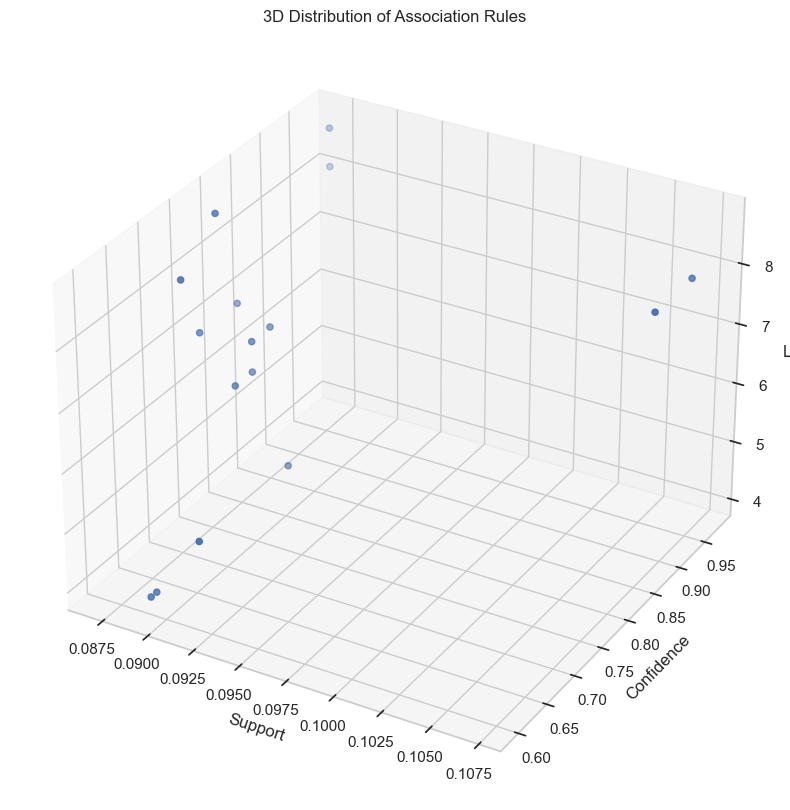

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = '3d')



x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")
plt.show()